<b>Задание</b>

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=true).

### распределение $\\chi^2$ (хи-квадрат) с $k$ степенями свободы, где $k=4$

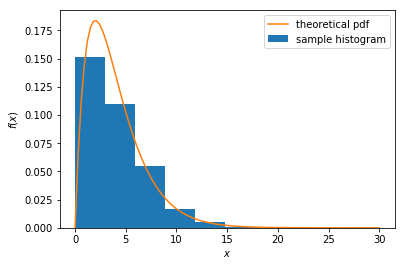

In [102]:
"""
Сгенерируйте из него выборку объёма 1000, 
постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.
"""
chi_rv = sts.chi2(4)
# выборка на 1000 элементов
sample = chi_rv.rvs(1000)
x = np.linspace(0,30,100)
pdf = chi_rv.pdf(x)

plt.hist(sample, normed=True, label='sample histogram')
plt.plot(x, pdf, label='theoretical pdf')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

Для распределения $\chi^2$, среднее: $k$, дисперсия: $2k$, где $k=4$

Cоответсвенно, $p = N(EX, \frac{DX}{n}) = N(4, \sqrt{\frac{8}{n}})$

In [118]:
def get_sample_mean(n):
    # Находим средние по выборке из семпла
    sample_means = []
    for rvn in range(1000):
        sample_means.append(chi_rv.rvs(n).mean())
    return sample_means

def prepare_data_for_experiment(size):
    # Вычисляем средние для сэмпла, pdf
    sample_means = get_sample_mean(n)
    norm_rv = sts.norm(4, np.sqrt(2.*4./n))
    x = np.linspace(0, 12, 100)
    pdf = norm_rv.pdf(x)
    return sample_means, x, pdf
   
def plot_data(sample_means, x, pdf):
    # Строим графики
    plt.hist(sample_means, 20, normed=True, range=[0, 12], label='sample means histogram')
    plt.plot(x, pdf, label='norm theoretical pdf')
    plt.legend()
    plt.title("Sample size %d" % n)
    plt.ylabel('fraction of samples $f(x)$')
    plt.xlabel('sample mean $x$')
    plt.show()    

Гистограмма для 5 средних


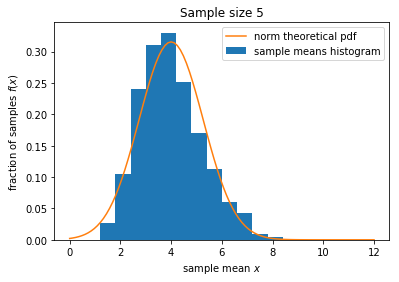

Гистограмма для 10 средних


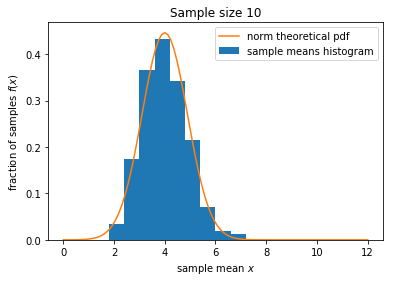

Гистограмма для 30 средних


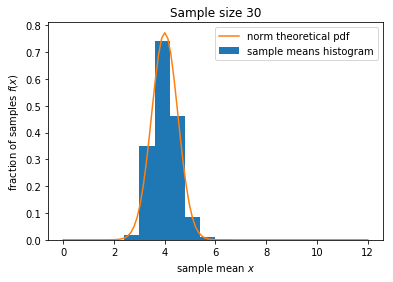

Гистограмма для 45 средних


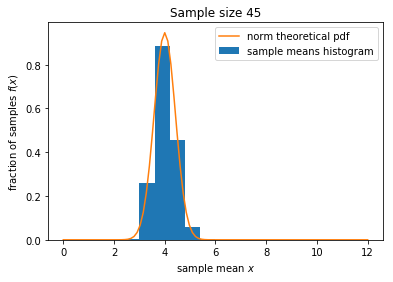

In [119]:
sizes = [5, 10, 30, 45]

for n in sizes:
    print("Гистограмма для " + str(n) + " средних")
    sample_means, x, pdf = prepare_data_for_experiment(n)
    _ = plot_data(sample_means, x, pdf)

# Вывод

С увеличением объема выборки <b><u>n</u></b> гистограмма становится все больше похожа на нормальное распределение.